In [105]:
import pandas as pd
import numpy as np

# Wrangling

In [106]:
data = pd.Series(np.random.randn(9),index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],[1, 2, 3, 1, 3, 1, 2, 2, 3]])

## Multi-Index

In [107]:
data.head(10)

a  1   -0.967703
   2    0.593887
   3    0.901253
b  1   -0.233674
   3   -0.233507
c  1    0.802211
   2   -1.334816
d  2    0.026547
   3   -1.334380
dtype: float64

In [108]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [109]:
data['b']

1   -0.233674
3   -0.233507
dtype: float64

In [110]:
data.unstack()

,1,2,3
a,-0.967703,0.593887,0.901253
b,-0.233674,NaN,-0.233507
c,0.802211,-1.334816,NaN
d,NaN,0.026547,-1.334380


In [111]:
data.unstack().stack()

a  1   -0.967703
   2    0.593887
   3    0.901253
b  1   -0.233674
   3   -0.233507
c  1    0.802211
   2   -1.334816
d  2    0.026547
   3   -1.334380
dtype: float64

In [112]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)), 
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]], 
                     columns=[['RN', 'RN', 'CE'],['Verde', 'Vermelho', 'Verde']])

In [113]:
frame.head(10)

RN             CE
    Verde Vermelho Verde
a 1     0        1     2
  2     3        4     5
b 1     6        7     8
  2     9       10    11

In [114]:
frame.sort_index(level=1)

RN             CE
    Verde Vermelho Verde
a 1     0        1     2
b 1     6        7     8
a 2     3        4     5
b 2     9       10    11

In [115]:
frame.groupby(level=0).sum()

RN             CE
  Verde Vermelho Verde
a     3        5     7
b    15       17    19

In [116]:
frame = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1), 'c': ['one', 'one', 'one', 'two', 'two', 'two', 'two'], 'd': [0, 1, 2, 0, 1, 2, 3]})

In [117]:
frame.head(7)

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [118]:
frame2 = frame.set_index(['c', 'd'])
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [119]:
frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


## Merge

### LEFT
Usado quando queremos preservar os dados do dataframe da esquerda e adicionar informações do dataframe da direita que possuam a mesma chave em comum.

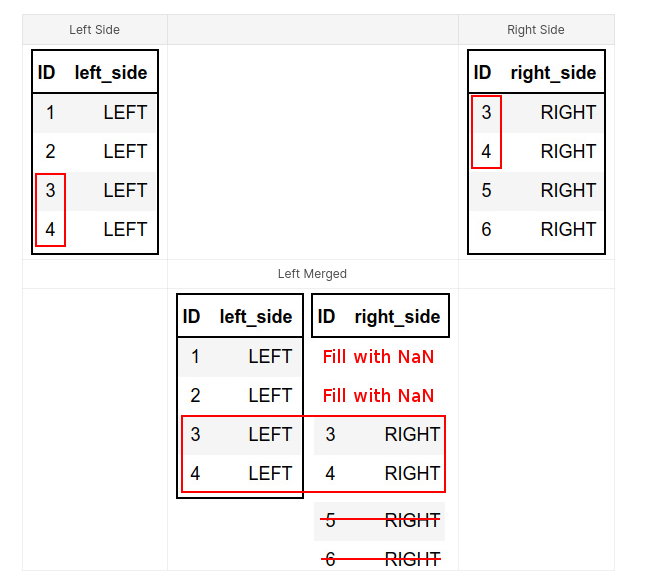

In [120]:
left_dataframe = pd.DataFrame({"ID": [1,2,3,4], "left_side": "LEFT"})
right_dataframe = pd.DataFrame({"ID": [3,4,5,6], "right_side": "RIGHT"})

pd.merge(left=left_dataframe, right=right_dataframe, on="ID", how="left")

,ID,left_side,right_side
0,1,LEFT,NaN
1,2,LEFT,NaN
2,3,LEFT,RIGHT
3,4,LEFT,RIGHT


In [121]:
left_dataframe2 = pd.DataFrame({"ID": [1,2,3,4], "left_side_idade": [20, 35, 23, 47]})
left_dataframe2

,ID,left_side_idade
0,1,20
1,2,35
2,3,23
3,4,47


In [122]:
right_dataframe2 = pd.DataFrame({"ID": [3,4,5,6], "right_side_peso": [60, 70, 67, 90]})
right_dataframe2

,ID,right_side_peso
0,3,60
1,4,70
2,5,67
3,6,90


In [123]:
pd.merge(left=left_dataframe2, right=right_dataframe2, on="ID", how="left")

,ID,left_side_idade,right_side_peso
0,1,20,NaN
1,2,35,NaN
2,3,23,60.0
3,4,47,70.0


### Right Merge

Igual ao left merge, mas preservando o dataframe da direita.

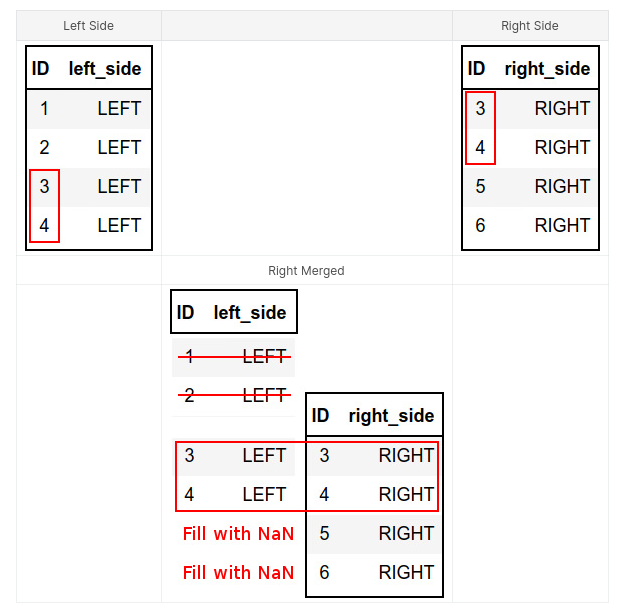

In [124]:
pd.merge(left=left_dataframe, right=right_dataframe, on="ID", how="right")

,ID,left_side,right_side
0,3,LEFT,RIGHT
1,4,LEFT,RIGHT
2,5,NaN,RIGHT
3,6,NaN,RIGHT


### INNER Merge

Usa apenas o que existe em comum entre os dois dataframes. Não vai adicionar NaNs.

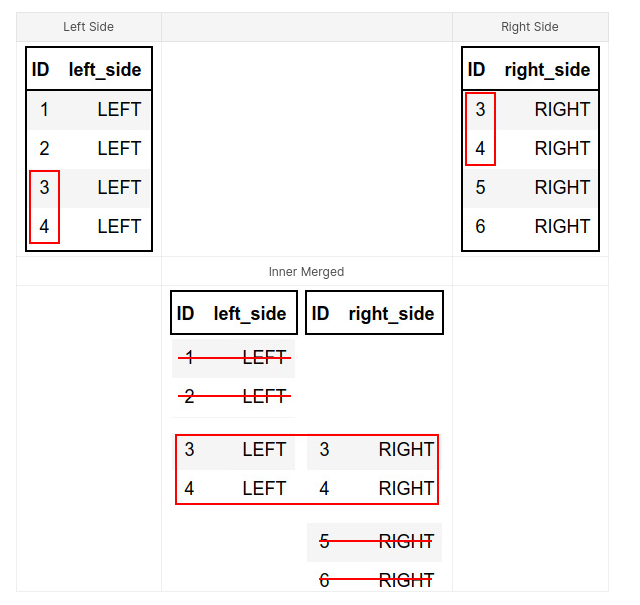

In [125]:
pd.merge(left=left_dataframe, right=right_dataframe, on="ID", how="inner")

,ID,left_side,right_side
0,3,LEFT,RIGHT
1,4,LEFT,RIGHT


In [126]:
# Também funciona, o pandas procura o nome em comum
pd.merge(left_dataframe, right_dataframe)

,ID,left_side,right_side
0,3,LEFT,RIGHT
1,4,LEFT,RIGHT


In [127]:
#Também funciona
left_dataframe.merge(right_dataframe)

,ID,left_side,right_side
0,3,LEFT,RIGHT
1,4,LEFT,RIGHT


### OUTER Merge

Mantem os dados de dois dataframes, colocando NaN nas linhas faltantes.

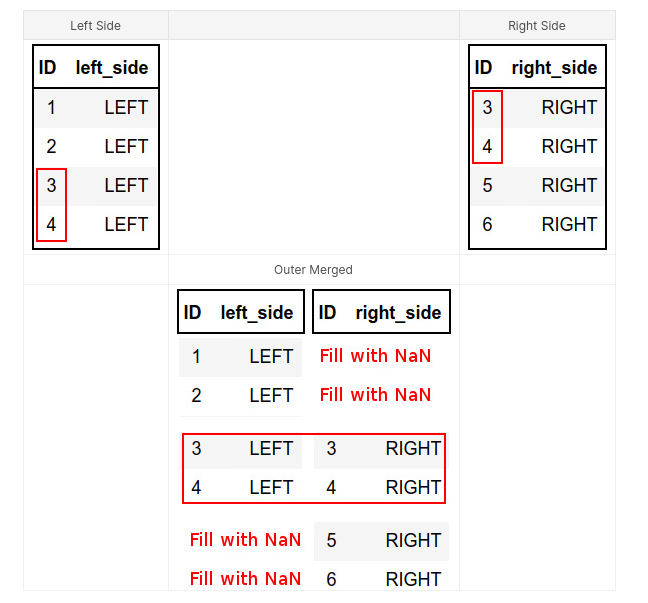

In [128]:
pd.merge(left=left_dataframe, right=right_dataframe, on="ID", how="outer")

,ID,left_side,right_side
0,1,LEFT,NaN
1,2,LEFT,NaN
2,3,LEFT,RIGHT
3,4,LEFT,RIGHT
4,5,NaN,RIGHT
5,6,NaN,RIGHT


### left_on, right_on

Paramêtro que permite especificar o nome das colunas nos dois lados caso elas sejam diferentes.

In [129]:
right_dataframe.columns = ['CUSTOMER_ID', 'right_side']
right_dataframe.head()

,CUSTOMER_ID,right_side
0,3,RIGHT
1,4,RIGHT
2,5,RIGHT
3,6,RIGHT


In [130]:
pd.merge(left=left_dataframe, right=right_dataframe, left_on="ID", right_on='CUSTOMER_ID', how="inner")

,ID,left_side,CUSTOMER_ID,right_side
0,3,LEFT,3,RIGHT
1,4,LEFT,4,RIGHT


## Pivot Table
Usado para resumir os dados.

```
pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)
```

In [132]:
df = pd.read_csv('titanic_train.csv')
df.head()

,Unnamed: 0,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0,1,0,1,0.2750,0.014151,0,0,1,0.1,1,0,0,0,0,0,1
1,1,2,1,0,0.4750,0.139136,1,0,0,0.1,1,0,0,0,1,0,0
2,2,3,1,0,0.3250,0.015469,0,0,1,0.0,0,0,0,1,0,0,1
3,3,4,1,0,0.4375,0.103644,1,0,0,0.1,1,0,0,0,0,0,1
4,4,5,0,1,0.4375,0.015713,0,0,1,0.0,1,0,0,0,0,0,1


In [133]:
df.drop(['PassengerId','Unnamed: 0'],inplace=True,axis=1)

In [134]:
df_sex = pd.pivot_table(data=df,index=['Sex'],aggfunc='count')
df_sex

,Age,Emb_1,Emb_2,Emb_3,Family_size,Fare,Pclass_1,Pclass_2,Pclass_3,Survived,Title_1,Title_2,Title_3,Title_4
Sex,,,,,,,,,,,,,,
0,279,279,279,279,279,279,279,279,279,279,279,279,279,279
1,513,513,513,513,513,513,513,513,513,513,513,513,513,513


No handles with labels found to put in legend.


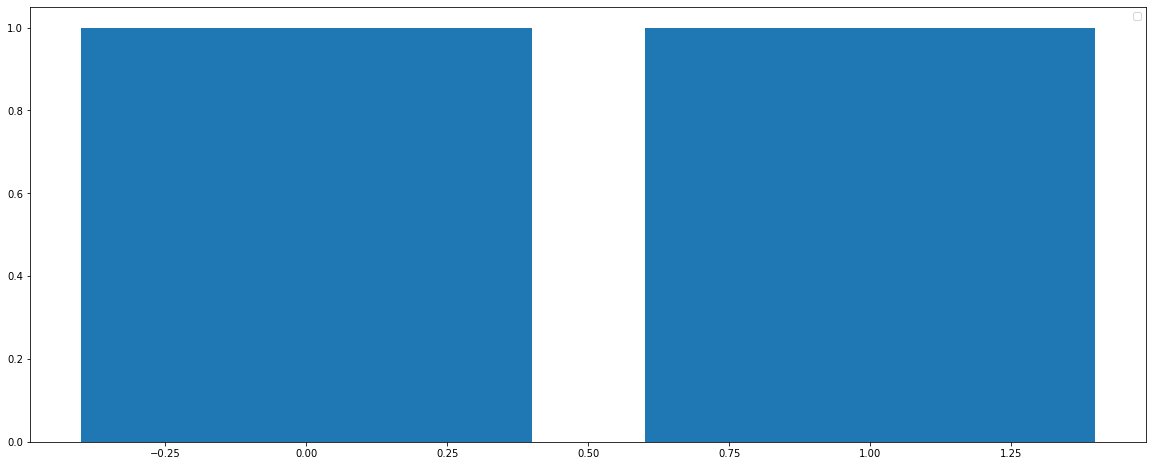

In [135]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.bar(data=df,x=df['Sex'],height=df.iloc[:,0])
plt.legend()
#plt.bar(data=df,x=df['Sex'],height=df.iloc[:,1])
plt.show()

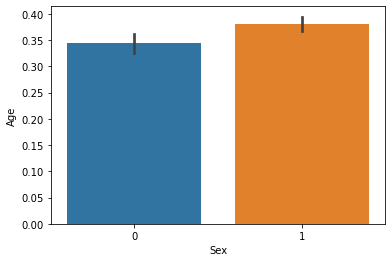

In [136]:
import seaborn as sns
ax = sns.barplot(x="Sex", y='Age', data=df)

In [137]:
table = pd.pivot_table(df,index=['Sex','Pclass_1'])
table

Age     Emb_1     Emb_2     Emb_3  Family_size      Fare  \
Sex Pclass_1                                                                  
0   0         0.316793  0.121212  0.171717  0.707071     0.139899  0.034520   
    1         0.412037  0.481481  0.012346  0.493827     0.102469  0.219866   
1   0         0.349112  0.112219  0.092269  0.795511     0.068080  0.027787   
    1         0.496029  0.348214  0.008929  0.642857     0.061607  0.137836   

              Pclass_2  Pclass_3  Survived   Title_1   Title_2   Title_3  \
Sex Pclass_1                                                               
0   0         0.353535  0.646465  0.661616  0.368687  0.005051  0.000000   
    1         0.000000  0.000000  0.962963  0.444444  0.037037  0.000000   
1   0         0.236908  0.763092  0.139651  0.925187  0.000000  0.074813   
    1         0.000000  0.000000  0.366071  0.982143  0.000000  0.017857   

               Title_4  
Sex Pclass_1            
0   0         0.626263  
    1         0.518519  
1   0         0.000000  
    1         0.000000

In [138]:
# é possível usar diferentes aggfunc além do default que é o np.mean()
table = pd.pivot_table(df,index=['Sex','Pclass_1'],aggfunc={'Age':np.mean,'Survived':np.sum})
table

Age  Survived
Sex Pclass_1                    
0   0         0.316793       131
    1         0.412037        78
1   0         0.349112        56
    1         0.496029        41

In [139]:
# para selecionar algumas features use o values
table = pd.pivot_table(df,index=['Sex','Pclass_1'],values=['Survived'], aggfunc=np.mean)
table

Survived
Sex Pclass_1          
0   0         0.661616
    1         0.962963
1   0         0.139651
    1         0.366071